# Лабораторная работа 4, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий в ЛР 1

## 2. Создание бейзлайна и оценка качества

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Сделаем предобработку данных

In [18]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [19]:
# Инициализация и обучение модели случайного леса
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_shelter, y_train_shelter)

RandomForestClassifier()

Оценка качества модели

Accuracy: 0.74
F1 Score: 0.68
Recall: 0.66
Precision: 0.70


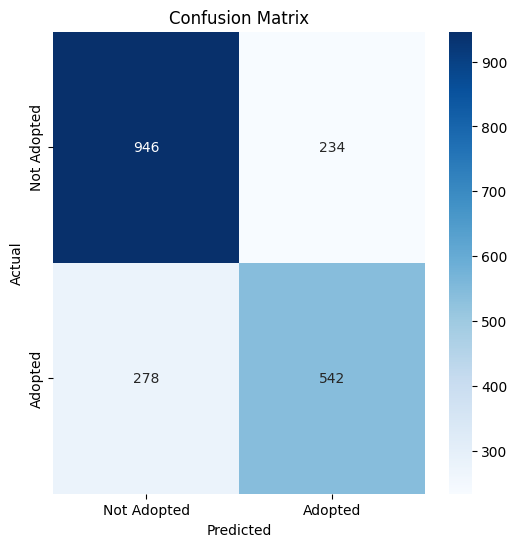

In [20]:
# Предсказание
y_pred_shelter = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_forest = accuracy_score(y_test_shelter, y_pred_shelter)
f1_forest = f1_score(y_test_shelter, y_pred_shelter)
recall_forest = recall_score(y_test_shelter, y_pred_shelter)
precision_forest = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_forest:.2f}")
print(f"F1 Score: {f1_forest:.2f}")
print(f"Recall: {recall_forest:.2f}")
print(f"Precision: {precision_forest:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [21]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [22]:
# Инициализация и обучение модели случайного леса
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_house, y_train_house)

RandomForestRegressor()

Оценка качества модели

In [23]:
# Предсказание
y_pred_house = forest_reg.predict(X_test_house)

# Метрики качества
mae_forest = mean_absolute_error(y_test_house, y_pred_house)
rmse_forest = root_mean_squared_error(y_test_house, y_pred_house)
r2_forest = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_forest:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_forest:.2f}")
print(f"R^2 Score: {r2_forest:.2f}")

Mean Absolute Error (MAE): 125167.60
Root Mean Squared Error (RMSE): 194491.30
R^2 Score: 0.74


## 3. Улучшение бейзлайна

### a. Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

1. Улучшение предобработки данных: масштабирование

2. Формирование новых признаков на основе комбинации существующих

3. Подбор гиперпараметров: Grid Search с кросс-валидацией для оптимизации модели

### b.1 Проверка гипотез для задачи классификации

1. Масштабирование данных

In [24]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели случайного леса
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_scaled = forest_clf.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy_forest:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1_forest:.2f}")

Гипотеза 1: масштабирование
Accuracy: 0.75
F1 Score: 0.68
Recall: 0.67
Precision: 0.70

Сравнение с бейзлайном:
Разница в Accuracy: 0.00
Разница в F1 Score: 0.00


2. Формирование новых признаков

In [25]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели случайного леса
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = forest_clf.predict(X_test_shelter_scaled)

accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)
recall_new_feature = recall_score(y_test_shelter, y_pred_shelter_new_feature)
precision_new_feature = precision_score(y_test_shelter, y_pred_shelter_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy_forest:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1_forest:.2f}")

Гипотеза 2: добавление нового признака
Accuracy: 0.76
F1 Score: 0.70
Recall: 0.69
Precision: 0.71

Сравнение с бейзлайном:
Разница в Accuracy: 0.01
Разница в F1 Score: 0.02


3. Подбор гиперпараметров

In [30]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [10, 12, 15],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_forest_clf = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_forest_clf.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_best - accuracy_forest:.2f}")
print(f"Разница в F1 Score: {f1_best - f1_forest:.2f}")

Лучшие параметры: {'max_depth': None, 'min_samples_split': 12, 'n_estimators': 150}
Лучшая кросс-валидация: 0.78

Гипотеза 3: подбор гиперпараметров
Accuracy: 0.76
F1 Score: 0.70
Recall: 0.67
Precision: 0.73

Сравнение с бейзлайном:
Разница в Accuracy: 0.02
Разница в F1 Score: 0.02


### b.2 Проверка гипотез для задачи регрессии

1. Масштабирование данных

In [31]:
# Масштабирование данных
scaler_house = MinMaxScaler()
X_train_house_scaled = scaler_house.fit_transform(X_train_house)
X_test_house_scaled = scaler_house.transform(X_test_house)

# Обучение модели случайного леса
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = forest_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
rmse_scaled = root_mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae_forest:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse_forest:.2f}")
print(f"Разница в R^2: {r2_scaled - r2_forest:.2f}")

Гипотеза 1: масштабирование
Mean Absolute Error (MAE): 125342.47
Root Mean Squared Error (RMSE): 194881.81
R-squared (R^2): 0.74

Сравнение с бейзлайном:
Разница в MAE: 174.87
Разница в RMSE: 390.51
Разница в R^2: -0.00


2. Формирование новых признаков

In [32]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели случайного леса
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = forest_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
rmse_new_feature = root_mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae_forest:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse_forest:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2_forest:.2f}")

Гипотеза 2: добавление нового признака
Mean Absolute Error (MAE): 125025.63
Root Mean Squared Error (RMSE): 193474.53
R-squared (R^2): 0.75

Сравнение с бейзлайном:
Разница в MAE: -141.96
Разница в RMSE: -1016.77
Разница в R^2: 0.00


3. Подбор гиперпараметров

In [33]:
# Масштабирование данных
scaler = MinMaxScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [10, 12, 15],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_house_scaled, y_train_house)

# Лучшие параметры и их оценка
best_forest_reg = grid_search.best_estimator_
best_score = -grid_search.best_score_  # Инвертируем, так как использовался отрицательный MAE

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация (MAE): {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_house_gs = best_forest_reg.predict(X_test_house_scaled)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
rmse_gs = root_mean_squared_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae_forest:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse_forest:.2f}")
print(f"Разница в R^2: {r2_gs - r2_forest:.2f}")

Лучшие параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Лучшая кросс-валидация (MAE): -0.71

Гипотеза 3: подбор гиперпараметров
Mean Absolute Error (MAE): 125714.66
Root Mean Squared Error (RMSE): 194522.49
R-squared (R^2): 0.74

Сравнение с бейзлайном:
Разница в MAE: 547.06
Разница в RMSE: 31.19
Разница в R^2: -0.00


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, параметры: {'max_depth': None, 'min_samples_split': 12, 'n_estimators': 150}, а также новый признак: AgeInDays и IsDog

В улучшенном бейзлайне для регрессии добавим масштабирование, параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}, а также добавим новый признак: total_area

Классификация

In [34]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = MinMaxScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

forest_clf = RandomForestClassifier(max_depth=None, min_samples_split=10, n_estimators=150)

Регрессия

In [35]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная


# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

forest_reg = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=100)

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [36]:
forest_clf.fit(X_train_shelter, y_train_shelter)

RandomForestClassifier(min_samples_split=10, n_estimators=150)

Регрессия

In [37]:
forest_reg.fit(X_train_house, y_train_house)

RandomForestRegressor(max_depth=10, min_samples_split=10)

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [38]:
# Предсказание
y_pred_shelter_best = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_best_forest = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best_forest = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best_forest = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best_forest = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_best_forest:.2f}")
print(f"F1 Score: {f1_best_forest:.2f}")
print(f"Recall: {recall_best_forest:.2f}")
print(f"Precision: {precision_best_forest:.2f}")

Accuracy: 0.76
F1 Score: 0.70
Recall: 0.67
Precision: 0.73


Регрессия

In [39]:
# Предсказание
y_pred_house_best = forest_reg.predict(X_test_house)

# Метрики качества
mae_best_forest = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_best_forest = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_best_forest = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best_forest}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_forest}")
print(f"R-squared (R^2): {r2_best_forest}")

Mean Absolute Error (MAE): 125398.95762313859
Root Mean Squared Error (RMSE): 194421.68409136139
R-squared (R^2): 0.7451061026883429


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [40]:
print(f"Разница в accuracy: {accuracy_best_forest - accuracy_forest}")
print(f"Разница в F1 Score: {f1_best_forest - f1_forest}")

Разница в accuracy: 0.01749999999999996
Разница в F1 Score: 0.017944862155388486


Регрессия

In [61]:
print(f"Разница в MAE: {mae_best_forest - mae_forest}")
print(f"Разница в RMSE: {rmse_best_forest - rmse_forest}")
print(f"Разница в R^2: {r2_best_forest - r2_forest}")

Разница в MAE: 231.35829888859007
Разница в RMSE: -69.61261854835902
Разница в R^2: 0.000182562025560995


### g. Выводы

**Вывод по классификации:**

Улучшения повысили точность и F1

**Вывод по регрессии:**

Улучшения повысили MAE, понизили RMSE, а также незначительно повысили R^2

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

Имплементация случайного леса для классификации

In [44]:
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.utils import resample


class RandomForestClassifierCustom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        """
        Инициализация классификатора случайного леса.
        :param n_estimators: количество деревьев.
        :param max_depth: максимальная глубина дерева.
        :param min_samples_split: минимальное количество примеров для разделения узла.
        :param min_samples_leaf: минимальное количество примеров в листе.
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.forests = []

    def fit(self, X_train, y_train):
        """
        Обучение модели случайного леса.
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие метки (вектор длины N).
        """
        for _ in range(self.n_estimators):
            # Бутстраппинг: выбор случайного поднабора данных с возвращением
            X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
            
            # Строим дерево решений для поднабора данных
            forest = DecisionTreeClassifier(max_depth=self.max_depth,
                                          min_samples_split=self.min_samples_split,
                                          min_samples_leaf=self.min_samples_leaf)
            forest.fit(X_resampled, y_resampled)
            self.forests.append(forest)

    def predict(self, X_test):
        """
        Предсказание меток для тестовых данных.
        :param X_test: тестовые признаки (матрица LxM).
        :return: предсказанные метки для тестовых данных.
        """
        # Получаем предсказания от всех деревьев
        forest_preds = np.array([forest.predict(X_test) for forest in self.forests])
        
        # Прогнозируем на основе голосования (модального значения)
        return np.array([Counter(preds).most_common(1)[0][0] for preds in forest_preds.T])

Имплементация случайного леса для регрессии

In [45]:
class RandomForestRegressorCustom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        """
        Инициализация регрессора случайного леса.
        :param n_estimators: количество деревьев.
        :param max_depth: максимальная глубина дерева.
        :param min_samples_split: минимальное количество примеров для разделения узла.
        :param min_samples_leaf: минимальное количество примеров в листе.
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.forests = []

    def fit(self, X_train, y_train):
        """
        Обучение модели случайного леса.
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие целевые значения (вектор длины N).
        """
        for _ in range(self.n_estimators):
            # Бутстраппинг: выбор случайного поднабора данных с возвращением
            X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
            
            # Строим дерево решений для поднабора данных
            forest = DecisionTreeRegressor(max_depth=self.max_depth,
                                          min_samples_split=self.min_samples_split,
                                          min_samples_leaf=self.min_samples_leaf)
            forest.fit(X_resampled, y_resampled)
            self.forests.append(forest)

    def predict(self, X_test):
        """
        Предсказание целевых значений для тестовых данных.
        :param X_test: тестовые признаки (матрица LxM).
        :return: предсказанные целевые значения для тестовых данных.
        """
        # Получаем предсказания от всех деревьев
        forest_preds = np.array([forest.predict(X_test) for forest in self.forests])
        
        # Прогнозируем как среднее от всех предсказаний
        return np.mean(forest_preds, axis=0)

### b. Обучение имплементированной модели

Классификация

In [46]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

forest_clf = RandomForestClassifierCustom()
forest_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [47]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

forest_reg = RandomForestRegressorCustom()
forest_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.72
F1 Score: 0.65
Recall: 0.64
Precision: 0.67


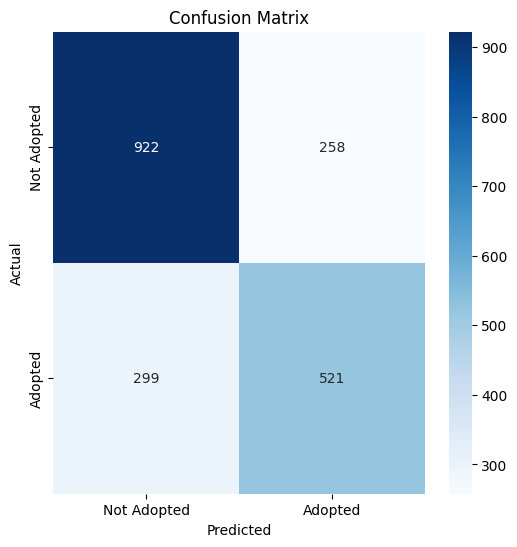

In [48]:
# Предсказание
y_pred_shelter = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_forest = accuracy_score(y_test_shelter, y_pred_shelter)
f1_custom_forest = f1_score(y_test_shelter, y_pred_shelter)
recall_custom_forest = recall_score(y_test_shelter, y_pred_shelter)
precision_custom_forest = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_custom_forest:.2f}")
print(f"F1 Score: {f1_custom_forest:.2f}")
print(f"Recall: {recall_custom_forest:.2f}")
print(f"Precision: {precision_custom_forest:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [49]:
# Предсказание
y_pred_house = forest_reg.predict(X_test_house)

# Метрики качества
mae_custom_forest = mean_absolute_error(y_test_house, y_pred_house)
rmse_custom_forest = root_mean_squared_error(y_test_house, y_pred_house)
r2_custom_forest = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_custom_forest}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_forest}")
print(f"R-squared (R^2): {r2_custom_forest}")

Mean Absolute Error (MAE): 171164.23550208332
Root Mean Squared Error (RMSE): 279748.3535876102
R-squared (R^2): 0.47227810318088137


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [50]:
print(f"Разница в accuracy: {accuracy_custom_forest - accuracy_forest}")
print(f"Разница в F1 Score: {f1_custom_forest - f1_forest}")

Разница в accuracy: -0.022499999999999964
Разница в F1 Score: -0.02754070918384144


Регрессия

In [51]:
print(f"Разница в MAE: {mae_custom_forest - mae_forest}")
print(f"Разница в RMSE: {rmse_custom_forest - rmse_forest}")
print(f"Разница в R^2: {r2_custom_forest - r2_forest}")

Разница в MAE: 45996.63617783332
Разница в RMSE: 85257.05687770044
Разница в R^2: -0.2726454374819005


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась хуже, чем для встроенной модели. Особенно пострадал Recall

В случае с линейной регрессией, ошибки увеличились, а R^2 стал заметно ниже

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [52]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = MinMaxScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

forest_clf = RandomForestClassifierCustom(max_depth=None, min_samples_split=10, n_estimators=150)

Регрессия

In [53]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная


# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

forest_reg = RandomForestRegressorCustom(max_depth=10, min_samples_split=10, n_estimators=100)

### g. Обучение на улучшенном бейзлайне

Классификация

In [54]:
forest_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [55]:
forest_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.72
F1 Score: 0.66
Recall: 0.65
Precision: 0.67


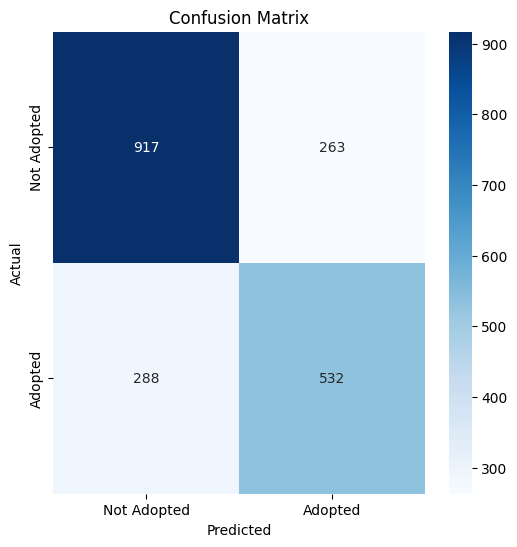

In [56]:
# Предсказание
y_pred_shelter_best = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_best_forest = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_custom_best_forest = f1_score(y_test_shelter, y_pred_shelter_best)
recall_custom_best_forest = recall_score(y_test_shelter, y_pred_shelter_best)
precision_custom_best_forest = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_custom_best_forest:.2f}")
print(f"F1 Score: {f1_custom_best_forest:.2f}")
print(f"Recall: {recall_custom_best_forest:.2f}")
print(f"Precision: {precision_custom_best_forest:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [57]:
# Предсказание
y_pred_house_best = forest_reg.predict(X_test_house)

# Метрики качества
mae_custom_best_forest = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_custom_best_forest = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_custom_best_forest = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_custom_best_forest}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_best_forest}")
print(f"R-squared (R^2): {r2_custom_best_forest}")

Mean Absolute Error (MAE): 145797.94902362785
Root Mean Squared Error (RMSE): 249781.3563556763
R-squared (R^2): 0.5792829860133931


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [58]:
print(f"Разница в accuracy: {accuracy_custom_best_forest - accuracy_best_forest}")
print(f"Разница в F1 Score: {f1_custom_best_forest - f1_best_forest}")

Разница в accuracy: -0.03699999999999992
Разница в F1 Score: -0.03831932773109248


Регрессия

In [60]:
print(f"Разница в MAE: {mae_custom_best_forest - mae_best_forest}")
print(f"Разница в RMSE: {rmse_custom_best_forest - rmse_best_forest}")
print(f"Разница в R^2: {r2_custom_best_forest - r2_best_forest}")

Разница в MAE: 20398.991400489263
Разница в RMSE: 55359.672264314926
Разница в R^2: -0.16582311667494976


### j. Выводы

Точность имплементированной модели с улучшениями для задачи классификации оказалась хуже встроенной модели. Возможно, в данном случае были подобраны не лучшие гиперпараметры

Ошибки в имплементированной модели с улучшениями увеличились, R^2 стал лучше, чем без улучшений, но всё равно хуже встроенной модели